In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  
import glob
import os
from PIL import Image



import numpy as np 
import glob
from sklearn.metrics import confusion_matrix , accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

In [6]:
dataset = []
label = []  #Placeholders to define add labels. We will add 1 to all parasitized images and 0 to uninfected.

In [7]:
import glob
import cv2
from PIL import Image
import numpy as np

dataset = []
label = []

path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\*.png'  # Adjust the extension if necessary

for f in glob.iglob(path):
    print(f)  # Check if files are being found
    img1 = cv2.imread(f)
    if img1 is None:
        print(f"Error loading image: {f}")
        continue
    img1 = Image.fromarray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    img1 = img1.resize((224, 224))
    dataset.append(np.array(img1))
    label.append(0)

print(f"Dataset length: {len(dataset)}")  # Verify the dataset length

C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (10).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (100).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1000).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1001).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1002).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (101).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (102).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (103).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (104).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (105).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1

In [8]:
import glob
import cv2
from PIL import Image
import numpy as np

dataset = []
label = []

paths = [
    ('C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\*.png', 1),  # Path and label for MS-Axial
    ('C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\*.png', 0),
    ('C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Sagittal\*.png',1),
    ('C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Sagittal\*.png',0)  # Path and label for Control-Axial
]

# Process images from all directories
for path, lbl in paths:
    for f in glob.iglob(path):
        print(f)  # Check if files are being found
        img1 = cv2.imread(f)
        if img1 is None:
            print(f"Error loading image: {f}")
            continue
        img1 = Image.fromarray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        img1 = img1.resize((224, 224))
        dataset.append(np.array(img1))
        label.append(lbl)  # Append the corresponding label

# Convert lists to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

print(f"Dataset length: {len(dataset)}")  # Verify the dataset length
print(f"Label length: {len(label)}")  # Verify the label length

C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (1).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (10).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (100).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (101).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (102).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (103).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (104).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (105).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (106).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (107).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (108).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (109).png
C:\MINOR\Multiple Scelorisis\Dataset\Multip

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30, random_state = 0)

In [10]:
len(X_train)

2398

In [11]:
len(X_test)

1029

In [12]:
X_train = X_train /255.
X_test = X_test /255.

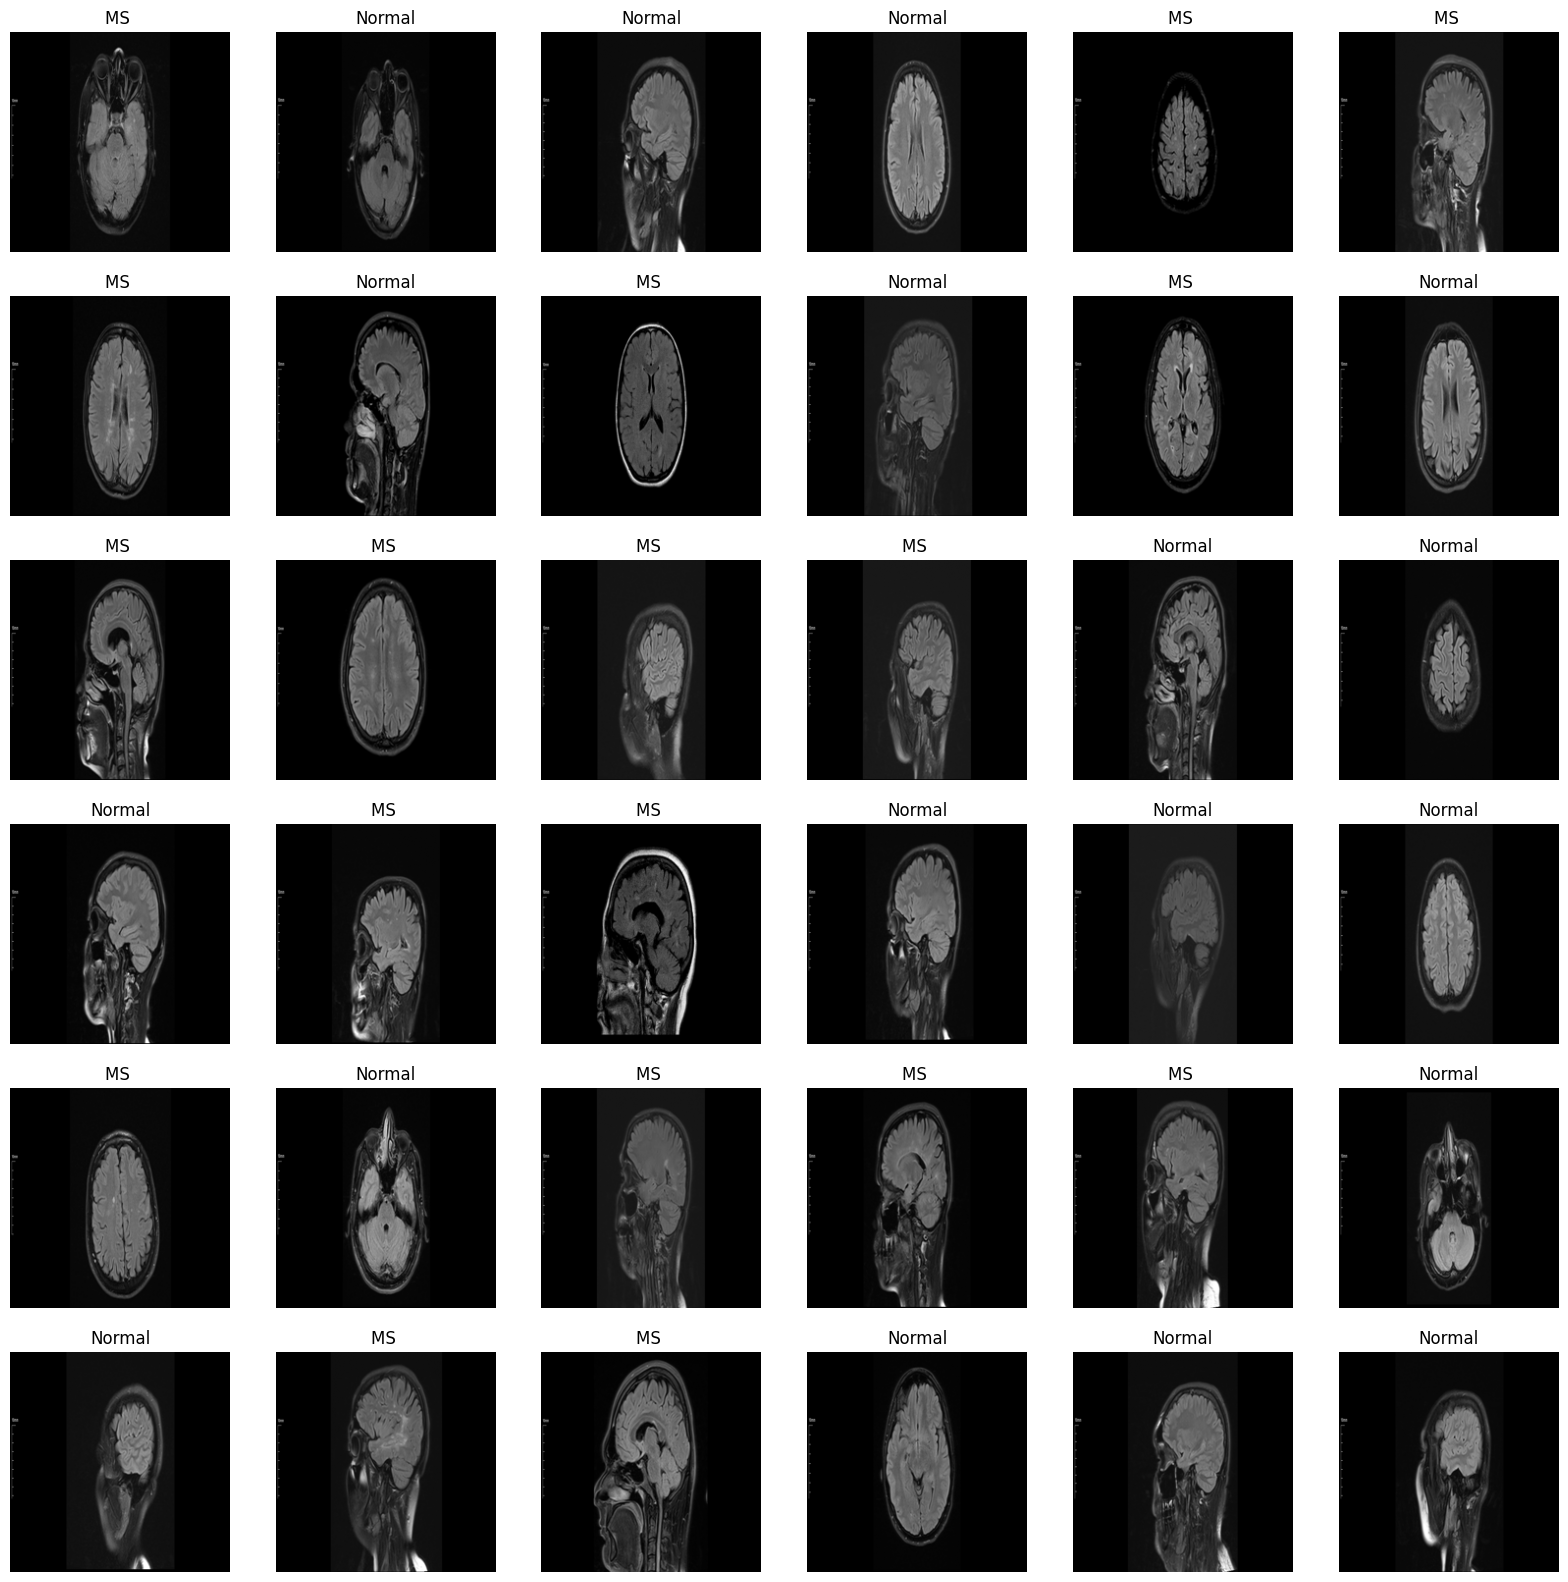

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mapping from labels to names
label_names = {0: 'Normal', 1: 'MS '}  # Update with your actual labels and names

plt.figure(figsize=(20, 20))

# Assuming X_train contains image data and y_train contains numeric labels (0 or 1)
for n, i in enumerate(np.random.randint(0, len(X_train), 36)):
    plt.subplot(6, 6, n+1)
    
    # Display the image
    plt.imshow(X_train[i])
    
    # Remove axis ticks
    plt.axis('Off')
    
    # Set the title as the class name based on the label
    plt.title(label_names[y_train[i]], fontsize=12)

plt.show()


In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
def get_model(input_shape = (224,224,3)):
    
    vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape = input_shape )

    for layer in vgg.layers[:-5]:    #Set block5 trainable, all others as non-trainable
        print(layer.name)
        layer.trainable = False #All others as non-trainable.

    x = vgg.output
    x = GlobalAveragePooling2D()(x) #Use GlobalAveragePooling and NOT flatten. 
    x = Dense(2, activation="softmax")(x)  #We are defining this as multiclass problem. 

    model = Model(vgg.input, x)
    model.compile(loss = "categorical_crossentropy", 
              optimizer = Adam(learning_rate=0.0001), metrics=["accuracy"])
    
    return model

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv

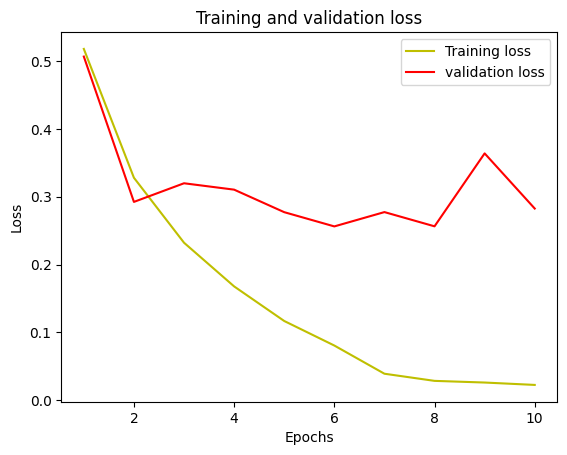

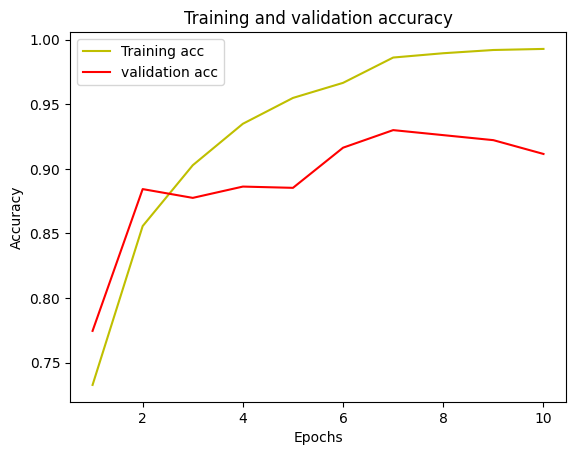

In [16]:
model=get_model(input_shape=(224,224,3))
print(model.summary())
history=model.fit(X_train,y_train,batch_size=16,epochs=10,verbose=1,validation_data=(X_test,y_test))
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


33/33 [==============================] - 190s 6s/step - loss: 0.2826 - accuracy: 0.9116
Accuracy =  91.15646481513977 %


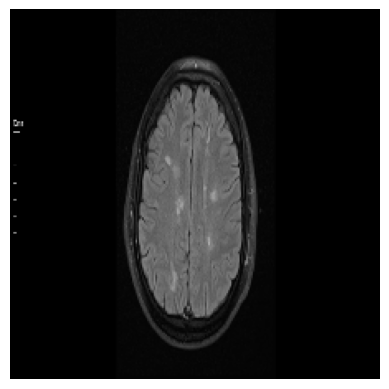

1/1 [==============================] - 0s 417ms/step
The prediction for this image is:  Diagnosed with MS 


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the target size for your model's input
img_height, img_width = 224, 224  # Replace with your model's expected input dimensions

# Load model and test data
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

# Path of the image to be loaded for testing
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (646).png'

# Load the image from the path and preprocess it
img = image.load_img(image_path, target_size=(img_height, img_width))  # Resize the image to match your model's input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array_normalized = img_array / 255.0  # Normalize the image for model input

# Display the image (without normalization)
plt.imshow(np.uint8(img_array))  # Convert back to uint8 for display
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Expand dimensions to match the input shape of the model
input_img = np.expand_dims(img_array_normalized, axis=0)  # (1, x, y, c)

# Predict the class of the image
prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
print("The prediction for this image is: ", label_names[predicted_class])


In [18]:
model.save('VGG16.h5')

In [20]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("VGG16.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (7).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
predicted_class = label_names[predicted_label[0]]

# Print the predicted class
print(f'Status: {predicted_class}')



1/1 [==============================] - 0s 373ms/step
Status: Diagnosed with MS 


In [21]:
import numpy as np
from keras.models import load_model
model=load_model("VGG16.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Sagittal\MS-S (5).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
predicted_class = label_names[predicted_label[0]]

# Print the predicted class
print(f'Status: {predicted_class}')

1/1 [==============================] - 0s 313ms/step
Status: Diagnosed with MS 


In [22]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("VGG16.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (12).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
predicted_class = label_names[predicted_label[0]]

# Print the predicted class
print(f'Status: {predicted_class}')

1/1 [==============================] - 0s 421ms/step
Status: Does not have MS


In [24]:
import numpy as np
from keras.models import load_model
import cv2
model=load_model("VGG16.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Testing-image.png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
predicted_class = label_names[predicted_label[0]]

# Print the predicted class
print(f'Status: {predicted_class}')

1/1 [==============================] - 0s 360ms/step
Status: Diagnosed with MS 


In [25]:
import numpy as np
from keras.models import load_model
import cv2
model=load_model("VGG16.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (13).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
label_names = {0: 'Does not have MS', 1: 'Diagnosed with MS '}  # Update with your actual labels and names
predicted_class = label_names[predicted_label[0]]

# Print the predicted class
print(f'Status: {predicted_class}')

1/1 [==============================] - 0s 327ms/step
Status: Does not have MS
